<a href="https://colab.research.google.com/github/fasihere/stroke-prediction/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction
*Done by Faseeh Ahmed and Shaheel P.*

The importance of data science in various domains are increasing in a large rate. The extend of medical applications of data science are still being explored. 

In this project, we use machine learning algorithms to predict whether a particular person may have stroke using some measures. We will compare some models and choose the best performing model for the prediction.

### Importing Neccessary Libraries

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

### Importing Dataset

In [9]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [10]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [20]:
print(train.shape)
print(test.shape)

(43400, 12)
(18601, 11)


### Data Preprocessing

In [12]:
train_missing_values = train.isnull().sum()
test_missing_values = test.isnull().sum()

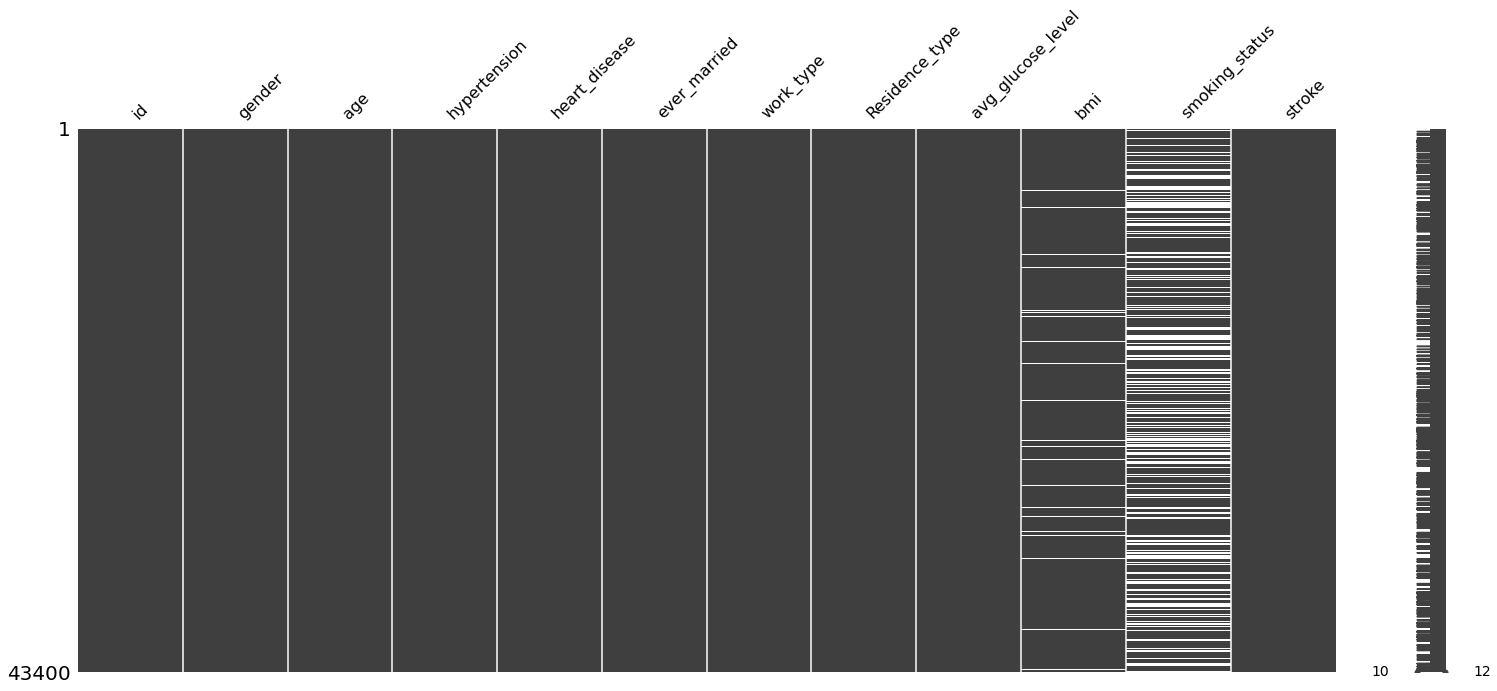

In [13]:
ms.matrix(train)

In [19]:
train_data = train.dropna()
test_data = test.dropna()
print('train data shape: {}'.format(train_data.shape))
print('test data shape: {}'.format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


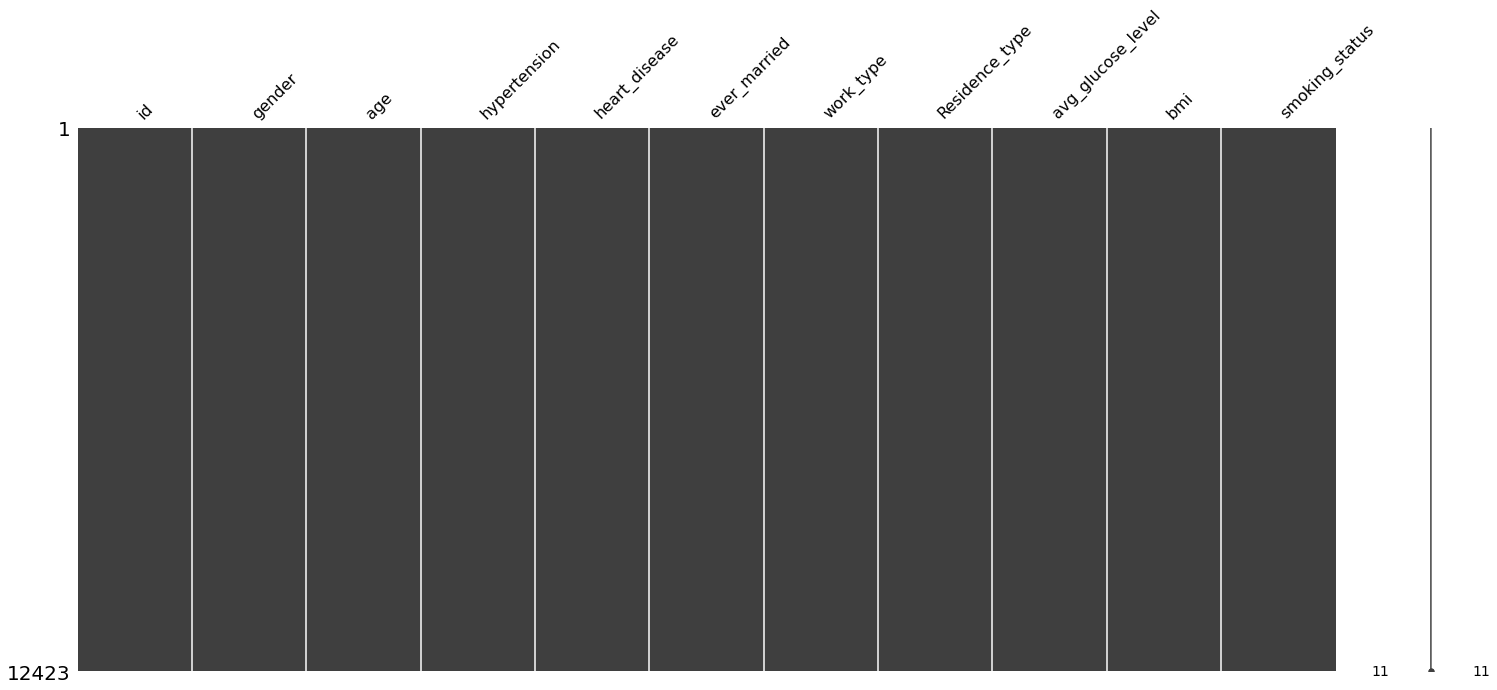

In [22]:
ms.matrix(train_data)

### Data Analysis

In [25]:
train_data['stroke'].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

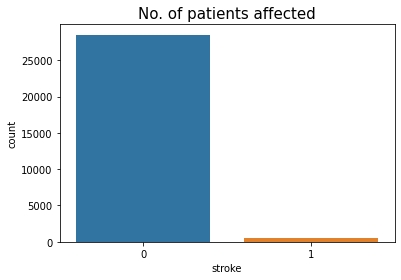

In [26]:
sns.countplot(x=train_data['stroke'])
plt.title('No. of patients affected', fontsize=15)
plt.show()

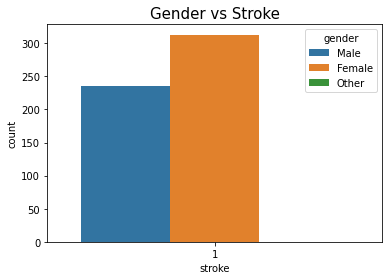

In [32]:
sns.countplot(x=train_data[train_data['stroke']==1]['stroke'], hue=train_data['gender'])
plt.title('Gender vs Stroke', fontsize=15)
plt.show()

In [41]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [43]:
train_data['smoking_status'].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [44]:
train_data.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

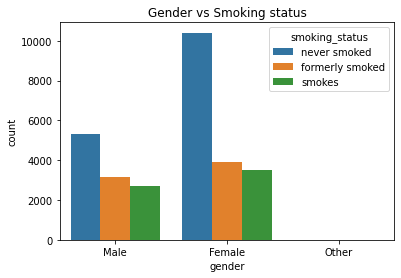

In [48]:
sns.countplot(x=train_data['gender'], hue=train_data['smoking_status'])
plt.title('Gender vs Smoking status')
plt.show()

In [52]:
str_data = train_data.select_dtypes(include=['object'])
str_dt = test_data.select_dtypes(include=['object'])
str_data

,gender,ever_married,work_type,Residence_type,smoking_status
1,Male,Yes,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
6,Female,Yes,Private,Urban,formerly smoked
7,Female,Yes,Self-employed,Rural,never smoked
8,Female,Yes,Private,Rural,smokes
...,...,...,...,...,...
43395,Female,No,children,Urban,never smoked
43396,Female,Yes,Govt_job,Urban,formerly smoked
43397,Female,Yes,Private,Urban,formerly smoked
43398,Male,Yes,Private,Urban,never smoked


In [55]:
int_data = train_data.select_dtypes(include=['integer', 'float'])
int_dt = test_data.select_dtypes(include=['integer','float'])

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [58]:
test1 = str_dt.apply(label.fit_transform)
Test = test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


### Modelling & predicting the data

In [59]:
xtrain=features.drop(['stroke'],axis=1)
xtrain.shape

(29072, 11)

In [65]:
ytrain=features['stroke']
ytrain.head(10)
ytrain.shape

(29072,)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21804, 11)
(7268, 11)
(21804,)
(7268,)


In [70]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
39880,0,1,3,1,1,16932,73.0,0,0,92.90,28.3
35940,1,0,2,0,0,51202,50.0,0,0,93.10,27.3
2293,0,1,2,1,1,30491,39.0,0,0,78.90,26.7
15304,0,1,2,0,2,63709,56.0,0,0,217.39,33.0
25728,0,0,0,0,1,20294,24.0,0,0,93.46,32.0


In [71]:
y_train.head()

39880    0
35940    0
2293     0
15304    0
25728    0
Name: stroke, dtype: int64

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
predict = model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
test_score = model.score(x_test,y_test)
print('NBtest_score :',test_score)

NBtest_score : 0.9746835443037974


### Confusion Matrix

In [78]:
nb_conf_mtr = pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7078,55
1,129,6


### Naive Bayes Report

In [79]:
from sklearn.metrics import classification_report

In [80]:
nbreport = classification_report(y_test,predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7133
           1       0.10      0.04      0.06       135

    accuracy                           0.97      7268
   macro avg       0.54      0.52      0.52      7268
weighted avg       0.97      0.97      0.97      7268



## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt_mod = DecisionTreeClassifier()
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
dt_predict = dt_mod.predict(x_test)
dt_predict

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
ts_dt_score = dt_mod.score(x_test,y_test)
print('DT score: ', ts_dt_score)

DT score:  0.9621629058888277


## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

In [87]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rfc_predict = rfc.predict(x_test)
rfc_predict

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
rfc_score = rfc.score(x_test,y_test)
rfc_score

0.9814254265272427

In [90]:
from sklearn.neural_network import MLPClassifier

In [92]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [95]:
mlp_predict = mlp.predict(x_test)

In [94]:
mlp_score = mlp.score(x_test,y_test)
mlp_score

0.9814254265272427

## Conclusion
The scores obtained for MLP Classifier is maximum. Hence, we have obtained a maximum score of **0.98142** in stroke prediction.